In [1]:
%matplotlib inline
import pylab as plt
import numpy as np

from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import binom


### Maximum likelihood and the normal distribution

Let $h_1, h_2, ..., h_N$ be a dataset of $N$ measurements. We want to summarize this dataset using a normal distribution with parameters $\mu$ and variance $\sigma^2$. We will use the maximum likelihood method to estimate the parameters.

We assume our observations are ***independent and identically distributed (i.i.d)***. That is, we assume all our observations are independently drawn from 

$\begin{align}
h_i \sim \mathcal{N}(\mu, \sigma^2)
\end{align}$

The first step is the write down the likelihood function $p(y_1, y_2, ... , y_N|\mu, \sigma^2)$. We have,

$\begin{align}
    p(y_1, y_2, ..., y_N|\mu, \sigma^2) &\stackrel{\text{i.i.d.}}{=} \prod_{i=1}^N p(h_i|\mu, \sigma^2) \\
    &= \prod_{i=1}^N \mathcal{N}(h_i|\mu, \sigma^2)
\end{align}$

We can now take the logarithm on both sides

$\begin{align}
    \log p(y_1, y_2, ..., y_N|\mu, \sigma^2)  &=  \log \left[\prod_{i=1}^N \mathcal{N}(h_i|\mu, \sigma^2)\right] = \sum_{i=1}^N \log \left[\mathcal{N}(h_i|\mu, \sigma^2)\right].
\end{align}$

Recall that the probability density function for the normal distribution is given by

$\begin{align}
    \mathcal{N}(h|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left(-\frac{(h-\mu)^2}{2\sigma^2}\right) 
\end{align}$

The **maximum likelihood estimators** for $\mu$ and $\sigma^2$ are given by:

$\begin{align}
\hat{\mu}_{\text{ML}} &= \frac{1}{N}\sum_{i=1}^N h_i\\
\hat{\sigma}^2_{\text{ML}} &=  \frac{1}{N}\sum_{i=1}^N (h_i - \hat{\mu}_{\text{ML}})^2\\
\end{align}$


That is, these are the specific values for $\mu$ and $\sigma^2$ that maximizes the expression in eq. (1). 







### Task 1: Derive the maximum likelihood estimator for the variance $\sigma^2$

Your task is now to derive the expression for $\hat{\sigma}^2_{\text{ML}}$ shown in eq. (4).

Hints:

1) We want to maximize eq (1) with respect to $\sigma^2$.
2) Take the right hand side of eq. (2) and substitute into the right hand side of eq. (1)
3) Take the derivative of eq. (1) with respect to $\sigma^2$
4) Disregards terms that are constant with respect to $\sigma^2$
5) Set the result equal to zero and solve for $\sigma^2$


### Task 2: The log likelihood vs the likelihood

As mentioned in the lecture, we most often use the log likelihood rather than the likelihood directly. There are several reasons for this.

First of all, Eq. (1) contains a product of probability density values. These values tend to quite small and hence, the product will be even smaller and this can sometimes cause numerical problems because the values can get below numerical precision when represented in a computer. For example, consider the numbers $\exp(-500) > 0$ and $\exp(-1000) > 0$. We know that both values are strictly positive numbers because of the exponential. But


In [3]:
print('np.exp(-500):\t\t', np.exp(-500))
print('np.exp(-1000):\t\t', np.exp(-1000))
print('np.exp(-1000) == 0:\t', np.exp(-1000) == 0)

np.exp(-500):		 7.124576406741286e-218
np.exp(-1000):		 0.0
np.exp(-1000) == 0:	 True


The good news is that we can easily represent these numbers using logarithms.

There is also a second reason for using the logarithm. As seen in eq. (1), the logarithm essentially converts a product into a sum. Go back to your derivation in task 1 and argue why it is much more convinient to maximize the log likelihood instead of the likelihood directly.

### Implementing the maximum likelihood estimators

In the code below, we generate a dataset from the distribution $\mathcal{N}(5, 2^2)$ and use maximum likelihood to set how will we can recover the true parameters.

True mean: 5.000
Maximum likelihood estimator for the mean: 0.000

True variance: 4.000
Maximum likelihood estimator for the variance: 1.000


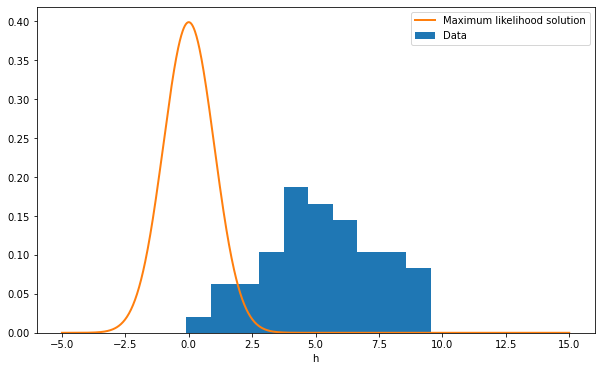

In [9]:
np.random.seed(0)

mu_true = 5
sigma2_true = 2**2

N = 50
h = np.random.normal(mu_true, np.sqrt(sigma2_true), size=N)

###############################################
# Insert your solution here
###############################################
mu_ML = 0
sigma2_ML =1


hs = np.linspace(-5, 15, 1000)
plt.figure(figsize=(10, 6))
plt.hist(h, 10, density=True, label='Data');
plt.plot(hs, norm.pdf(hs, mu_ML, np.sqrt(sigma2_ML)), label='Maximum likelihood solution', linewidth=2)
plt.legend()
plt.xlabel('h')


print('True mean: %4.3f' % mu_true)
print('Maximum likelihood estimator for the mean: %4.3f' % mu_ML)
print('')
print('True variance: %4.3f' % sigma2_true)
print('Maximum likelihood estimator for the variance: %4.3f' % sigma2_ML)

### Task 3: Varying the number of observations

Play around with the variable $N$. How many observations do we need to estimate to true value with an accuracy of 1 decimal? 2 decimals? 3 decimals?

# The binomial distribution: estimating proportions

The goal of the last part of the exercise is to familiarize yourself with Bayesian inference for proportions. That is, we consider an experiment, where the set of possible outcome is binary. We will denote the outcome $y = 1$ as **success** and the outcome $y=0$ as **failure**.

By repeating the experiment $N$ times we can estimate the probability of success using the Binomial distribution. Let $X$ be a random variable that counts the number of successes in $N$ trials, i.e.

$\begin{align}
X = \sum_{i=1}^N y_i.
\end{align}$

We can then model $X$ using the **binomial distribution**:

$\begin{align}
P(X = k|\theta) = {N \choose k} (1-\theta)^{N-k} \theta^k ,\tag{5}
\end{align}$

where $k$ is the number of successes, $N$ is the number of trials, and $\theta$ is the probability of success. Most often $N$ and $k$ are determined by the experiment and the goal is to estimate $\theta$ using the data at hand.  


We want to use Bayesian inference to estimate $\theta$. Therefore, we start by assigning a prior distribution for $\theta$. Specifically, we choose a Beta-distribution as a prior distribution for $\theta$. The [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) is a continous distribution over interval $[0, 1]$, so it is very convinient as a prior distribution for probabilities. The Beta density is given by:

$\begin{align}
p(\theta) = \frac{\Gamma(a_0 + b_0)}{\Gamma(a_0)\Gamma(b_0)} \theta^{a_0 - 1}(1-\theta)^{b_0 -1}, \tag{6}
\end{align}$

where $\Gamma(x)$ is the so-called [Gamma function](https://en.wikipedia.org/wiki/Gamma_function). The details of the Gamma function is not important for this exercise, but you can think of $\frac{\Gamma(a_0 + b_0)}{\Gamma(a_0)\Gamma(b_0)}$ as a normalization constant that makes $p(\theta)$ integrate to 1.

The Beta distribution has two parameters: $a_0 > 0$ and $b_0 > 0$. These parameters can be used to encode various forms of prior information into the following. You will experiment with this below.



The specific combination of the Beta distribution as prior and the Binomial distribution as likelihood has a special property called **conjugacy**. This means that resulting posterior distribution has the same form as the prior. That is, the posterior distribution of the parameter $\theta$ given our data $\textbf{y}$ is given by

$\begin{align}
p(\theta|\textbf{y}) = \text{Beta}(\theta|a_{post}, b_{post}) = \text{Beta}(\theta|a_0 + k, b_0 + N - k), \tag{7}
\end{align}$

where the parameters are given by

$\begin{align}
a_{post} &= a_0 + k\\
b_{post} &= b_0 + N - k
\end{align}$

We can use these parameters to compute the MAP-estimator and the Bayes-estimator:

$\begin{align}
\hat{\theta}_{MAP} &= \frac{a_{post} - 1}{a_{post} + b_{post} - 2}\tag{8}\\
\hat{\theta}_{Bayes} &= \frac{a_{post}}{a_{post} + b_{post}}\tag{9}
\end{align}$

For completeness, the maximum likelihood estimator is given by

$\begin{align}
\hat{\theta}_{ML} = \frac{k}{N} \tag{10}
\end{align}$








The code below will generate $N$ observations $y_1, y_2, ..., y_N$ from the binomial distribution using $\theta = 0.1$ as a true value. The idea is then to use our three estimators $\hat{\theta}_{ML}$, $\hat{\theta}_{MAP}$ and $\hat{\theta}_{Bayes}$ to try to recover the true value of $\theta$ based on the dataset $y_1, y_2, ..., y_N$.

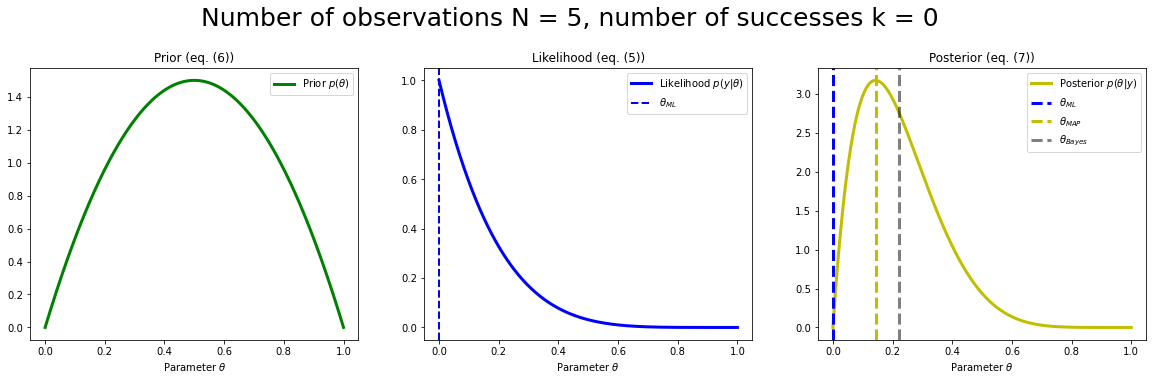

In [15]:
np.random.seed(0)

# set prior
a0 = 2
b0 = 2

# number of observations
N = 5

# true parameter
theta = 0.1

# generate data
y = np.random.binomial(1, theta, size=N)

# likelihood (eq. (5))
N = len(y)
k = np.sum(y)
likelihood = lambda p: binom.pmf(k, N, p)

# posterior (eq. (7))
a_post = a0 + k
b_post = b0 + N - k
post = lambda p:  beta.pdf(p, a_post, b_post)

# estimators (eq. (8), (9), (10))
theta_ML = k/N
theta_MAP = (a_post - 1)/(a_post + b_post - 2)
theta_Bayes = a_post/(a_post+b_post)


ps = np.linspace(1e-30, 1-1e-30, 1000)

fig = plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.plot(ps, beta.pdf(ps, a0, b0), 'g', linewidth=3, label='Prior $p(\\theta)$')
plt.legend()
plt.xlabel('Parameter $\\theta$')
plt.title('Prior (eq. (6))')

plt.subplot(1, 3, 2)
plt.plot(ps, likelihood(ps), 'b', linewidth=3, label='Likelihood $p(y|\\theta)$')
plt.axvline(theta_ML, linestyle='--', color='b', label='$\\theta_{ML}$', linewidth=2)
plt.legend()
plt.xlabel('Parameter $\\theta$')
plt.title('Likelihood (eq. (5))')

plt.subplot(1, 3, 3)
plt.plot(ps, beta.pdf(ps, a_post, b_post), 'y', linewidth=3, label='Posterior $p(\\theta|y)$')
plt.axvline(theta_ML, linestyle='--', color='b', label='$\\theta_{ML}$', linewidth=3)
plt.axvline(theta_MAP, linestyle='--', color='y', label='$\\theta_{MAP}$', linewidth=3)
plt.axvline(theta_Bayes, linestyle='--', color='k', label='$\\theta_{Bayes}$', linewidth=3, alpha=0.5)
plt.legend()
plt.xlabel('Parameter $\\theta$')
plt.title('Posterior (eq. (7))')

plt.suptitle('Number of observations N = %d, number of successes k = %d' % (N, k), fontsize=25, y=1.05);



### Tasks

1) Experiment with the code above and convince yourself that the posterior is a trade-off between the prior and the likelihood

2) Explain the three estimators: $\hat{\theta}_{ML}, \hat{\theta}_{MAP}, \hat{\theta}_{Bayes}$ in your own words.

3) The prior distribution has two parameters $a_0$ and $b_0$.  Try the following two set of parameters: $a_0 = b_0 = 1$ and $a_0 = 1, b_0 = 10$ and explain how the prior and posterior distributions change.

4) Go back to the setting $a_0 = b_0 = 2$. Experiment with different values for $N$ and convince yourself that as the number of data points increases, the likelihood will dominate and the choice of priors does not matter. What happens to the variance of the posterior as $N$ increases?

### Optional task

The Bayes estimator for this model is given by:

$\begin{align}
\hat{\theta}_{Bayes} = \int \theta p(\theta|\textbf{y}) \text{d}\theta = \frac{a_{\text{post}}}{a_{\text{post}} + b_{\text{post}}}\tag{11}
\end{align}$

We argued above that $a_{\text{post}} = a_0 + k$ and $b_{\text{post}} = b_0 + N - k$. Substitute these values into eq. (11) and  show that the posterior mean becomes independent on the prior when $N$ becomes large.

What dose the posteror mean will equal in this case?